<a href="https://colab.research.google.com/github/onni-Q/workshop_notebooks/blob/main/Week2_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with Pandas

This workshop notebook consist of data operations using a CSV (comma-separated values) file and the Pandas library. It is very similar to the lecture notebook, but we are using data from X/Twitter (tweets containing the words 'louvre heist').

This data was collected with the [Zeeschuimer](https://github.com/digitalmethodsinitiative/zeeschuimer) browser extension and converted to CSV with [Zeehaven](https://publicdatalab.github.io/zeehaven/). If you want to, you can also use your own data for this exercise!

Since the dataset is similar to the TikTok data, we can do very similar things with it, but there are some important differences (e.g., column names) that we will have to deal with.

To begin, we load Pandas, and set copy_on_write to `True` (can you learn from [the Pandas documentation](https://pandas.pydata.org/pandas-docs/version/2.0/user_guide/copy_on_write.html) what this means?).

In [31]:
import pandas as pd
pd.options.mode.copy_on_write = True

Mount the Google Drive.

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Get the path to 'twitter_louvre_heist.csv'.

In [33]:
df = pd.read_csv('/content/drive/MyDrive/Copy of twitter_louvre_heist.csv')

Read the CSV file into a DataFrame.

In [34]:
print(df.head())

                    id            thread_id           timestamp  \
0  1985049484854718867  1985049484854718867  2025-10-2 18:20:52   
1  1981780329552822722  1981780329552822722  2025-9-24 18:50:24   
2  1983435212441927888  1983435212441927888   2025-9-29 7:26:19   
3  1984679888456982795  1984679888456982795  2025-10-1 17:52:13   
4  1981662524241281340  1981662524241281340   2025-9-24 11:2:17   

   unix_timestamp                                            link  \
0   1762107652000       https://twitter.com/fourtrell/status/4037   
1   1761328224000      https://twitter.com/erinisaway/status/4038   
2   1761722779000     https://twitter.com/ambessasabs/status/4039   
3   1762019533000  https://twitter.com/bestofdaisyjej/status/4040   
4   1761300137000  https://twitter.com/thePulseGlobal/status/4041   

                                                body          author  \
0  Are we sure Charles Leclerc isn’t tied to the ...       fourtrell   
1  I think my fave thing about the lou

Print the last three lines of the DataFrame.

In [35]:
print(df.tail(3))

                      id            thread_id           timestamp  \
285  1984817744198451418  1984817744198451418     2025-10-2 3:0:1   
286  1983499092429795469  1983499092429795469   2025-9-29 11:40:9   
287  1981461605012394012  1981461605012394012  2025-9-23 21:43:55   

     unix_timestamp                                       link  \
285   1762052401000    https://twitter.com/CBSNews/status/4322   
286   1761738009000    https://twitter.com/CTVNews/status/4323   
287   1761252235000  https://twitter.com/emzanotti/status/4324   

                                                  body     author  \
285  Woman charged in Louvre crown jewels heist app...    CBSNews   
286  Police say Louvre defences lagged as jewel-hei...    CTVNews   
287  Well‚ either my daughter forced a chicken to p...  emzanotti   

     author_fullname  author_id  source  ... replied_user hashtags  \
285         CBS News   15012486     NaN  ...          NaN      NaN   
286         CTV News  203123011     NaN  

Check the column names and types with `.info()`.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  288 non-null    int64  
 1   thread_id           288 non-null    int64  
 2   timestamp           288 non-null    object 
 3   unix_timestamp      288 non-null    int64  
 4   link                288 non-null    object 
 5   body                288 non-null    object 
 6   author              288 non-null    object 
 7   author_fullname     288 non-null    object 
 8   author_id           288 non-null    int64  
 9   source              0 non-null      float64
 10  language_guess      288 non-null    object 
 11  possibly_sensitive  288 non-null    object 
 12  retweet_count       288 non-null    int64  
 13  reply_count         288 non-null    int64  
 14  like_count          288 non-null    int64  
 15  quote_count         288 non-null    int64  
 16  impressi

Sort the DataFrame by `like_count` and show the top three tweets.

In [37]:
df.sort_values(by='like_count', ascending=False).head(3)


,id,thread_id,timestamp,unix_timestamp,link,body,author,author_fullname,author_id,source,...,replied_user,hashtags,urls,images,videos,mentions,long_lat,place_name,location,verified
1,1981780329552822722,1981780329552822722,2025-9-24 18:50:24,1761328224000,https://twitter.com/erinisaway/status/4038,I think my fave thing about the louvre heist i...,erinisaway,e taylor,738208631456301056,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
9,1979937710132326403,1979937710132326403,2025-9-19 16:48:30,1760888910000,https://twitter.com/CultureExploreX/status/4046,They walked into Louvre Museum at 9:30 a.m. ...,CultureExploreX,Culture Explorer,2643780234,NaN,...,NaN,NaN,https://x.com/CultureExploreX/status/197993771...,NaN,https://pbs.twimg.com/amplify_video_thumb/1979...,NaN,NaN,NaN,NaN,True
18,1981342686742302990,1981342686742302990,2025-9-23 13:51:22,1761223882000,https://twitter.com/BowTiedMara/status/4055,The German company that built the forklift use...,BowTiedMara,BowTiedMara,862601854634602496,NaN,...,NaN,NaN,https://x.com/BowTiedMara/status/1981342686742...,https://pbs.twimg.com/media/G38kqjjXcAEZIkU.jpg,NaN,NaN,NaN,NaN,NaN,True


Create a sorted list of columns and how many values they are missing.

In [38]:
df.isna().sum().sort_values(ascending=False)

,0
source,288
location,288
quoted_user,288
long_lat,288
place_name,288
retweeted_user,288
replied_user,285
mentions,264
hashtags,262
videos,237


Drop the columns that have *all* values missing.

In [39]:
df = df.dropna(axis=1, how='all')
df.isna().sum().sort_values(ascending=False)

,0
replied_user,285
mentions,264
hashtags,262
videos,237
images,137
urls,87
timestamp,0
unix_timestamp,0
id,0
thread_id,0


Convert the `timestamp` column to DateTime. But be aware! Pandas will not be able to recognize the data format that this column currently holds. Is there another column that you can use to easily convert to DateTime? Use this alternative to overwrite the `timestamp` column.

In [40]:
df['timestamp'] = pd.to_datetime(df['unix_timestamp'])

print(df['timestamp'])


0     1970-01-01 00:29:22.107652
1     1970-01-01 00:29:21.328224
2     1970-01-01 00:29:21.722779
3     1970-01-01 00:29:22.019533
4     1970-01-01 00:29:21.300137
                 ...            
283   1970-01-01 00:29:21.768634
284   1970-01-01 00:29:21.819300
285   1970-01-01 00:29:22.052401
286   1970-01-01 00:29:21.738009
287   1970-01-01 00:29:21.252235
Name: timestamp, Length: 288, dtype: datetime64[ns]


Verify that the fresh `timestamp` column has values of type `datetime64[ns]`.

In [41]:
df['timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 288 entries, 0 to 287
Series name: timestamp
Non-Null Count  Dtype         
--------------  -----         
288 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.4 KB


Print out the dataframe with only the columns `author`, `body`, and `like_count`.

In [42]:
df[['author', 'body', 'like_count']]

,author,body,like_count
0,fourtrell,Are we sure Charles Leclerc isn’t tied to the ...,15541
1,erinisaway,I think my fave thing about the louvre heist i...,112459
2,ambessasabs,i can’t believe the louvre heist was just prom...,117
3,bestofdaisyjej,Daisy Edgar-Jones and Ella Hunt going as the l...,10007
4,thePulseGlobal,🇫🇷 The “French Detective” Photo Is Real — Not ...,53
...,...,...,...
283,AJEnglish,Two men arrested over France’s Louvre Museum j...,35
284,AJEnglish,Paris police have arrested five new suspects i...,60
285,CBSNews,Woman charged in Louvre crown jewels heist app...,26
286,CTVNews,Police say Louvre defences lagged as jewel-hei...,5


Let's create a new DataFrame called `df_selection` that contains only relevant columns. Depending on the actual analysis we are doing, we would select different columns. For today, let's do these: `id`, `timestamp`, `link`, `body`, `author`, `author_fullname`, `language_guess`, `retweet_count`, `reply_count`, `like_count`, `quote_count`, `impression_count`, `hashtags`, and `verified`.

After you've created your new dataframe, print out the first three rows.

In [43]:
df_selection = df[['id', 'timestamp', 'link', 'body', 'author', 'author_fullname', 'language_guess', 'retweet_count', 'reply_count', 'like_count', 'quote_count', 'impression_count', 'hashtags', 'verified']]
df_selection.head(3)

,id,timestamp,link,body,author,author_fullname,language_guess,retweet_count,reply_count,like_count,quote_count,impression_count,hashtags,verified
0,1985049484854718867,1970-01-01 00:29:22.107652,https://twitter.com/fourtrell/status/4037,Are we sure Charles Leclerc isn’t tied to the ...,fourtrell,emmy,en,1072,17,15541,108,337438,NaN,False
1,1981780329552822722,1970-01-01 00:29:21.328224,https://twitter.com/erinisaway/status/4038,I think my fave thing about the louvre heist i...,erinisaway,e taylor,en,7233,131,112459,232,1390818,NaN,False
2,1983435212441927888,1970-01-01 00:29:21.722779,https://twitter.com/ambessasabs/status/4039,i can’t believe the louvre heist was just prom...,ambessasabs,lina 🪼lesbian avatar department,en,9,1,117,1,1977,NaN,False


Let's again calculate an engagement ratio. We can use `retweet_count`, `reply_count`, `like_count`, and `quote_count` as the 'active' components and `impression_count` as the 'passive' one (i.e., divide the sum of the first with the second).

Print out the five tweets with the highest engagement ratio.

In [44]:
df_selection.columns
df_selection['engagement_ratio'] = (
    (df_selection['retweet_count'] + df_selection['reply_count'] + df_selection['like_count'] + df_selection['quote_count']) / df_selection['impression_count'])
df_selection.sort_values('engagement_ratio', ascending = False).head(5)

,id,timestamp,link,body,author,author_fullname,language_guess,retweet_count,reply_count,like_count,quote_count,impression_count,hashtags,verified,engagement_ratio
21,1982935445655957613,1970-01-01 00:29:21.603626,https://twitter.com/datiCEguy/status/4058,If the Louvre museum heist was a marketing stu...,datiCEguy,BIG iCE 🧊,en,86,82,96,0,1820,NaN,False,0
69,1982202859727794585,1970-01-01 00:29:21.428963,https://twitter.com/rainylune/status/4106,did i accidentally predict the future when i d...,rainylune,rachel 🐸🔪,en,435,15,5765,2,50923,NaN,False,0
194,1981468773241466913,1970-01-01 00:29:21.253944,https://twitter.com/starkeyboxd/status/4231,they were behind the louvre heist https://t.co...,starkeyboxd,han ❀,en,65,8,700,6,7033,NaN,False,0
39,1983199822204285324,1970-01-01 00:29:21.666658,https://twitter.com/rinuhanuki/status/4076,Police say they've acquired footage of the sus...,rinuhanuki,rinu 🍃,en,3,1,85,0,834,NaN,False,0
19,1983906461941223517,1970-01-01 00:29:21.835134,https://twitter.com/stunninbrina/status/4056,thumbs used for the louvre heist crazy 😭 https...,stunninbrina,millie,en,115,7,1114,8,13596,NaN,True,0


Based on the column `lanuage_guess`, create a new colum `language_en` that contains 'en' if `language_guess` is 'en' and 'other' for all other values.



In [45]:
def classify_language(language_guess):
    if language_guess == 'en':
        return 'en'
    else:
        return 'other'

df_selection['language_en'] = df_selection['language_guess'].apply(classify_language)


df_selection['language_en']

,language_en
0,en
1,en
2,en
3,en
4,en
...,...
283,en
284,en
285,en
286,en


Show the tweets that have `language_en` as 'other'.

In [46]:
df_selection[df_selection['language_en'] == 'other']

,id,timestamp,link,body,author,author_fullname,language_guess,retweet_count,reply_count,like_count,quote_count,impression_count,hashtags,verified,engagement_ratio,language_en
79,1981758689879937128,1970-01-01 00:29:21.323065,https://twitter.com/EmadHajjaj/status/4116,Louvre Heist https://t.co/2M26wVqn7C,EmadHajjaj,Emad Hajjaj Cartoons,ht,5,0,29,1,1479,NaN,True,0,other
84,1982563221279285545,1970-01-01 00:29:21.514880,https://twitter.com/PatChappatte/status/4121,After the Louvre jewel heist - © Chappatte in ...,PatChappatte,Chappatte Cartoons,fr,10,0,23,0,1238,NaN,False,0,other
184,1982943340237586860,1970-01-01 00:29:21.605508,https://twitter.com/daddiojoe53/status/4221,2 arrested in $100 Million Dollar Heist from L...,daddiojoe53,DaddioJoe,da,1,0,1,0,126,CoachCigWorthTheRisk,False,0,other
256,1982024344961495438,1970-01-01 00:29:21.386402,https://twitter.com/HDNER/status/4293,Türkiye creating risk map for museums amid Lou...,HDNER,Hürriyet Daily News,ro,2,1,3,0,599,NaN,True,0,other


Show all tweets with a `like_count` higher than 10000.

In [47]:
df_selection[df_selection['like_count'] > 10000]


,id,timestamp,link,body,author,author_fullname,language_guess,retweet_count,reply_count,like_count,quote_count,impression_count,hashtags,verified,engagement_ratio,language_en
0,1985049484854718867,1970-01-01 00:29:22.107652,https://twitter.com/fourtrell/status/4037,Are we sure Charles Leclerc isn’t tied to the ...,fourtrell,emmy,en,1072,17,15541,108,337438,NaN,False,0,en
1,1981780329552822722,1970-01-01 00:29:21.328224,https://twitter.com/erinisaway/status/4038,I think my fave thing about the louvre heist i...,erinisaway,e taylor,en,7233,131,112459,232,1390818,NaN,False,0,en
3,1984679888456982795,1970-01-01 00:29:22.019533,https://twitter.com/bestofdaisyjej/status/4040,Daisy Edgar-Jones and Ella Hunt going as the l...,bestofdaisyjej,best of daisy edgar-jones,en,358,6,10007,98,124223,NaN,False,0,en
5,1982530506232303988,1970-01-01 00:29:21.507080,https://twitter.com/jbillinson/status/4042,Not trying to backseat heist here but if I suc...,jbillinson,Josh Billinson,en,2560,256,69294,99,4282817,NaN,True,0,en
6,1981554854100422788,1970-01-01 00:29:21.274467,https://twitter.com/Variety/status/4043,"George Clooney says the Ocean's Fourteen"" scri...",Variety,Variety,en,833,137,15034,358,3145423,NaN,True,0,en
7,1981688259286901003,1970-01-01 00:29:21.306273,https://twitter.com/G2League/status/4044,100 Thieves tried to recreate the Louvre heist...,G2League,G2 League of Legends,en,771,38,12247,87,526434,NaN,True,0,en
9,1979937710132326403,1970-01-01 00:29:20.888910,https://twitter.com/CultureExploreX/status/4046,They walked into Louvre Museum at 9:30 a.m. ...,CultureExploreX,Culture Explorer,en,8454,2366,75517,1331,8745004,NaN,True,0,en
11,1985230106151849987,1970-01-01 00:29:22.150715,https://twitter.com/ThePopTingz/status/4048,Two men have been arrested after French police...,ThePopTingz,Pop Tingz,en,327,355,12122,452,719061,NaN,True,0,en
18,1981342686742302990,1970-01-01 00:29:21.223882,https://twitter.com/BowTiedMara/status/4055,The German company that built the forklift use...,BowTiedMara,BowTiedMara,en,9739,934,71866,1227,2683791,NaN,True,0,en
26,1979988742497554786,1970-01-01 00:29:20.901077,https://twitter.com/JackMacCFB/status/4063,Insane heist went down at the Louvre today in ...,JackMacCFB,Jack Mac,en,1138,269,17069,118,1724147,NaN,True,0,en


How many tweets mention that the Louvre thieves have been 'arrested'? (Bonus: try to find out how you can make this case-insensitive.)

In [48]:
df_selection[df_selection['body'].str.contains('arrested', na=False)]

,id,timestamp,link,body,author,author_fullname,language_guess,retweet_count,reply_count,like_count,quote_count,impression_count,hashtags,verified,engagement_ratio,language_en
11,1985230106151849987,1970-01-01 00:29:22.150715,https://twitter.com/ThePopTingz/status/4048,Two men have been arrested after French police...,ThePopTingz,Pop Tingz,en,327,355,12122,452,719061,NaN,True,0,en
28,1985043702021324814,1970-01-01 00:29:22.106273,https://twitter.com/CoffindafferFBI/status/4065,Louvre Update 5 now arrested in the $100 mi...,CoffindafferFBI,Jennifer Coffindaffer,en,2,4,57,0,7058,NaN,True,0,en
35,1982424399522209874,1970-01-01 00:29:21.481783,https://twitter.com/CoffindafferFBI/status/4072,Good news. Two of the thieves in the Louvre...,CoffindafferFBI,Jennifer Coffindaffer,en,27,24,302,4,44882,NaN,True,0,en
42,1982395405296959526,1970-01-01 00:29:21.474870,https://twitter.com/Maximilian_evm/status/4079,Two suspects in the Louvre heist were arrested...,Maximilian_evm,PolyMax 💎,en,1,20,84,0,7847,NaN,True,0,en
66,1982400993313898914,1970-01-01 00:29:21.476202,https://twitter.com/theheraldsun/status/4103,French police have arrested two suspects over ...,theheraldsun,Herald Sun,en,0,3,4,0,4304,NaN,True,0,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,1982458463104950380,1970-01-01 00:29:21.489904,https://twitter.com/washingtonpost/status/4312,Suspects have been arrested in the Louvre muse...,washingtonpost,The Washington Post,en,40,21,117,2,46318,NaN,True,0,en
276,1982379984413921551,1970-01-01 00:29:21.471193,https://twitter.com/CNN/status/4313,Two suspects have been arrested as part of the...,CNN,CNN,en,157,122,464,9,223313,NaN,True,0,en
281,1982596857000775688,1970-01-01 00:29:21.522900,https://twitter.com/SkyNews/status/4318,Two men have been arrested following a robbery...,SkyNews,Sky News,en,17,10,29,4,30366,NaN,True,0,en
283,1983627541417279790,1970-01-01 00:29:21.768634,https://twitter.com/AJEnglish/status/4320,Two men arrested over France’s Louvre Museum j...,AJEnglish,Al Jazeera English,en,14,3,35,0,21681,NaN,True,0,en


Use `.describe()` to get a statistical summary of our DataFrame.

In [49]:
pd.options.display.float_format = '{:.0f}'.format

df_selection.describe()


,id,timestamp,retweet_count,reply_count,like_count,quote_count,impression_count,engagement_ratio
count,288,288,288,288,288,288,288,288
mean,1982716853865593856,1970-01-01 00:29:21.551509208,159,30,1847,21,125723,0
min,1979892388056162560,1970-01-01 00:29:20.878104,0,0,0,0,126,0
25%,1981793231347085312,1970-01-01 00:29:21.331300,3,2,16,0,3544,0
50%,1982456566942042368,1970-01-01 00:29:21.489452,10,6,42,1,14164,0
75%,1983600625637336320,1970-01-01 00:29:21.762217,36,18,171,4,46152,0
max,1985323355533410560,1970-01-01 00:29:22.172948,9739,2366,112459,1331,8745004,0
std,1195232338531817,NaN,897,153,10157,120,638454,0


Print out the mean for all columns ending with `_count`.

In [50]:
df_selection[['retweet_count', 'reply_count', 'like_count', 'quote_count', 'impression_count']].mean()

,0
retweet_count,159
reply_count,30
like_count,1847
quote_count,21
impression_count,125723


Create a correlation matrix for all columns that contain numbers.

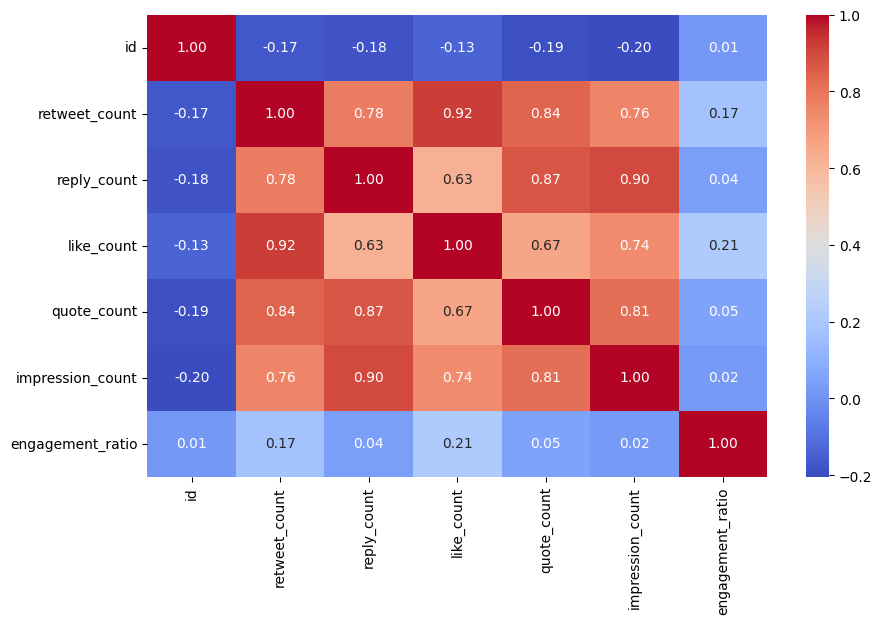

In [51]:
df_selection[['id', 'timestamp', 'retweet_count', 'reply_count', 'like_count', 'quote_count', 'impression_count']].corr()

import matplotlib.pyplot as plt
import seaborn as sns

df_selection_num = df_selection.select_dtypes(include='number')       # we select only the columns that contain numbers

plt.figure(figsize=(10, 6))
sns.heatmap(df_selection_num.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

The two columns `like_count` and `reply_count` have relatively low correlation. Let's show them on a scatterplot to investigate.

Text(0.5, 1.0, 'Scatterplot of Like Count vs Reply Count')

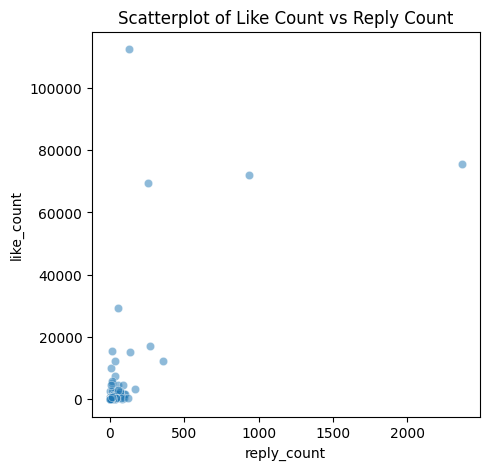

In [52]:
df_selection['like_count'].corr(df_selection['reply_count'])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_selection, x='reply_count', y='like_count', alpha=0.5)
plt.title('Scatterplot of Like Count vs Reply Count')




How many tweets come from verified authors?

In [53]:
df_selection.groupby('verified').size()

,0
verified,
False,52
True,236


Show the number of verified vs. non-verified users as a bar graph. The bars should be next to each other.

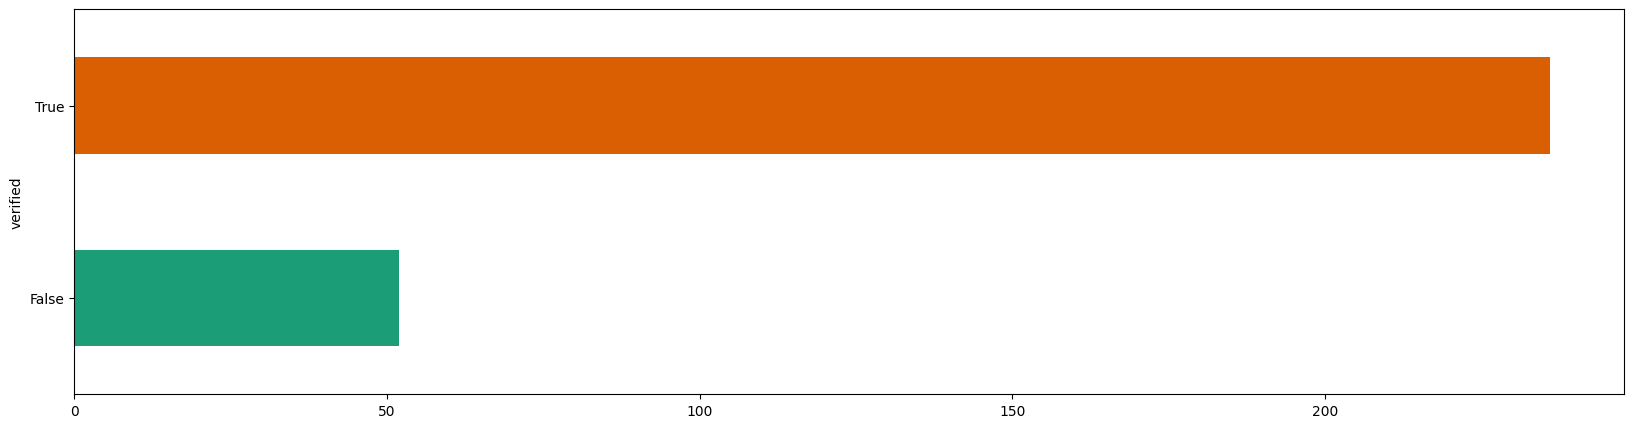

In [54]:

plt.figure(figsize=(20, 5))
df_selection.groupby('verified').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.show()

What is the average `like_count` for verified and non-verified users? Hint: use `.groupby()`.

In [55]:
df_selection.groupby('verified')['like_count'].mean()

,like_count
verified,
False,3889
True,1398


List the most active authors using `.groupby()`.

In [56]:
df_authors = df_selection.groupby('author')['retweet_count'].sum().sort_values(ascending=False)
df_authors.head(10)


,retweet_count
author,
BowTiedMara,9739
CultureExploreX,8454
erinisaway,7233
jbillinson,2560
jessica_smetana,2540
JackMacCFB,1204
ABC,1189
fourtrell,1072
Variety,833


How many authors have at least five tweets in our dataset?

In [57]:
(df_selection.groupby('author').size() >= 5).sum()



np.int64(7)

Create a Series that contains individual hashtags, using `.split()` and `.explode()`.

In [58]:
se_tags = df_selection['hashtags'].dropna().str.split(';').explode()
se_tags

,hashtags
24,LouvreHeist
24,Louvre
24,criminals
24,robbery
29,creator
29,creators
29,trendingposts
29,funnyclips
29,ugccommunity
29,louvre


And now create a bar chart that shows the top 10 most common hashtags.

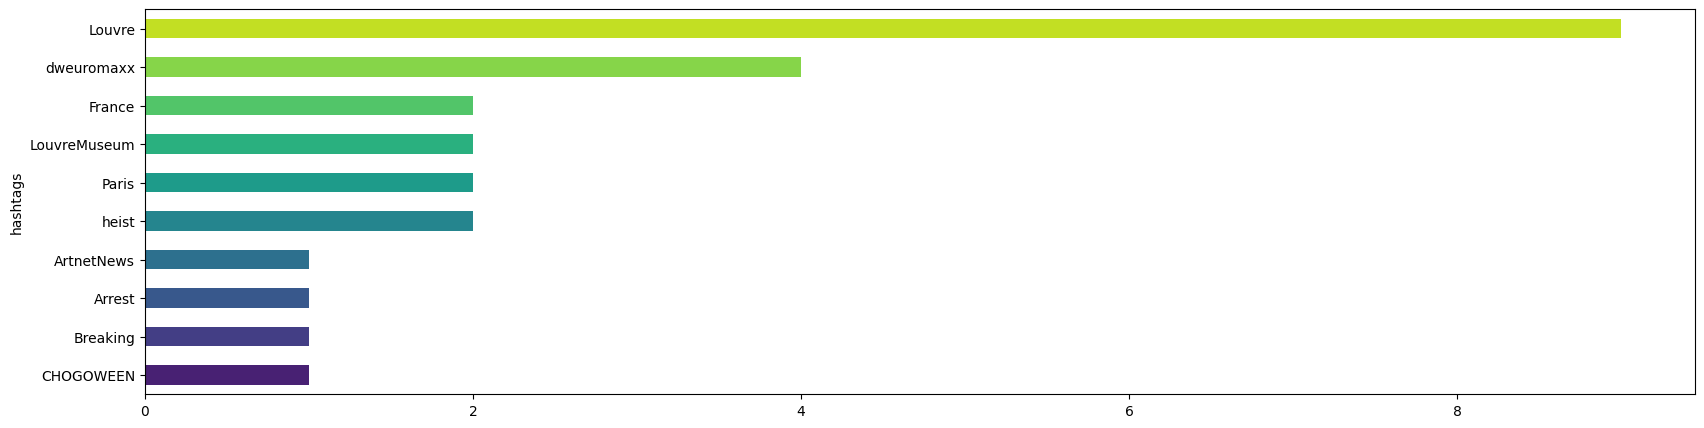

In [59]:
plt.figure(figsize=(20, 5))
se_tags.groupby(se_tags).size().sort_values(ascending=False).head(10).sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('viridis', 10))
plt.show()

Plot the tweets over time, but not per week like in the lecture notebook, but per day! Hint: you only have to change one character in two locations to adapt the example from the lecture.

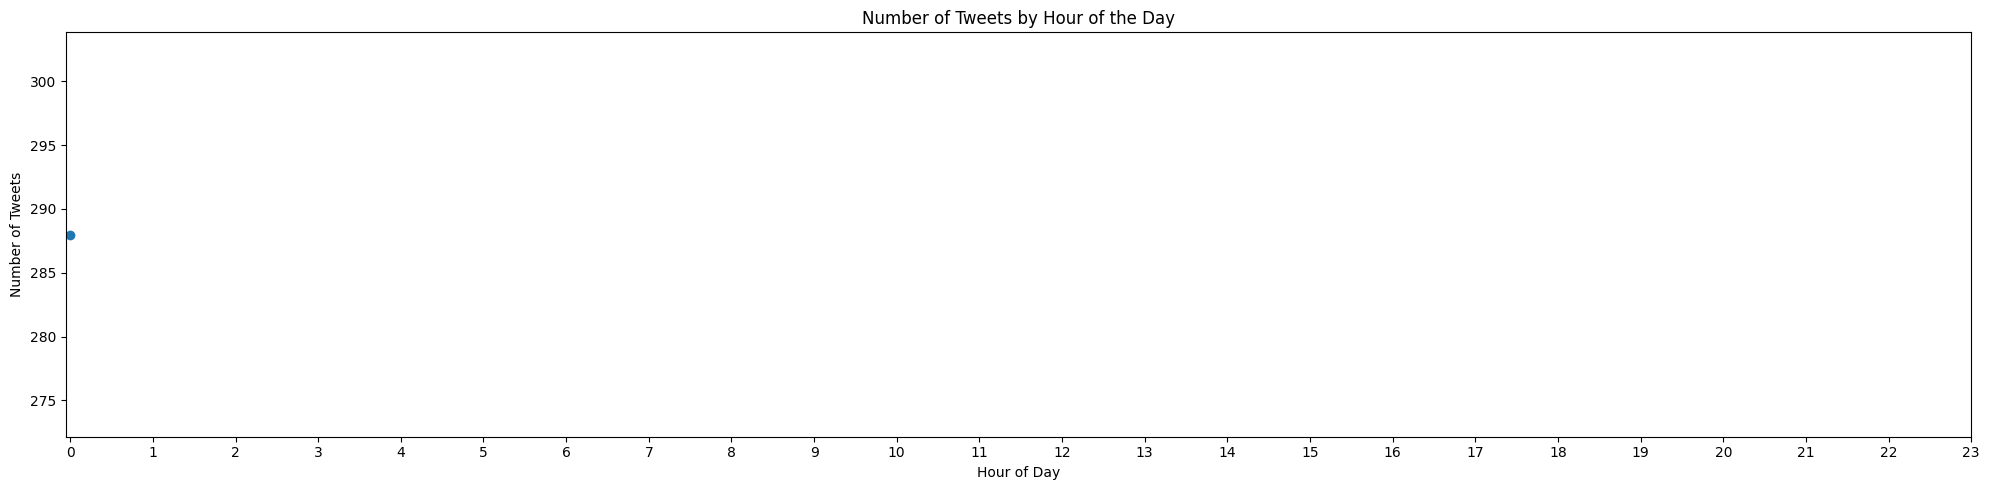

In [60]:



tweets_over_time_hourly = df_selection.groupby(df_selection['timestamp'].dt.hour).size()


plt.figure(figsize=(20, 5))
tweets_over_time_hourly.plot(kind='line', marker='o')
plt.title('Number of Tweets by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tweets')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()




That's it! Pandas can get complicated, but it is crucial to know for almost all data analysis tasks with Python. Now, nothing is holding you back from joining the [pandas community](https://pandas.pydata.org/community/blog/).